In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rc("axes", lw = 1.5)
plt.rc('xtick.major', size = 8.0)
plt.rc('ytick.major', size = 8.0)
plt.rc('xtick.minor', size = 4.0)
plt.rc('ytick.minor', size = 4.0)
mpl.rcParams['xtick.major.top'] = True
label_fontsize = 15

In [2]:
#Useful quantities, in cgs units
G = 6.67e-8           #Newton's gravitational constant
k_b = 1.38e-16        #Boltzman's constant
m_p = 1.67e-24
rho_air = 1.225e-3    #Density of air, Jennings
mu_air = m_p * 28.96  # Jennings
g = 980.              #acceleration of gravity at Earth's surface
c_s = 3.4e4           #sound speed
#Specific heat at constant volume, assume for a diatomic ideal gas
c_V = 5./2. * k_b /mu_air       # erg / g / Kelvin
c_P = 7./2. * k_b /mu_air
gamma = c_P / c_V
#
S_0 = 1.361e6         #Solar constant at the equator
S_0_bar = (75. + 24. + 88.) * 1.e3 # mean radiative energy absorbed by Earth's atmosphere
                      # Stephens et al. (2012) Nature Geoscience 5 691
                      # Atmospheric aborption of sunlight, sensible heating from ground, and
                      # latent heating; see Figure B1
S_0_tilde = 4. * S_0_bar # Absorbed S at the equator
Albedo = 0.29         # Earth's albedo from 
                      # Stephens, G. L., D. O’Brien, P. J. Webster, P. Pilewski, S. Kato, 
                      # and J.-l. Li (2015), The albedo of Earth, Rev. Geophys., 53, 140
R_Earth = 6.371e8     #Mean Earth radius
M_sun = 2.e33
AU = 1.5e13
#
year_in_seconds = 365.25 * 24. * 3600.
M_Earth = 5.9736e27              # grams
M_moon = 7.349e25                # grams; values from Yoder, and from "Thermal Tides jupyter notebook
a_moon_cgs_0 = 3.844e10          #cm
a_dot_0_cgs = 3.82 / year_in_seconds # \dot a = 3.81cm/yr, from Dickey et al. (Science) 1994
e_Moon = 0.0549         #Yoder (1995)
#
print('Surface pressure = ', rho_air * c_s**2/1.4)
print('S_0_bar, S_0_tilde= %5.3e %5.3e' % (S_0_bar, S_0_tilde) )

Surface pressure =  1011500.0000000001
S_0_bar, S_0_tilde= 1.870e+05 7.480e+05


index_24 =  400


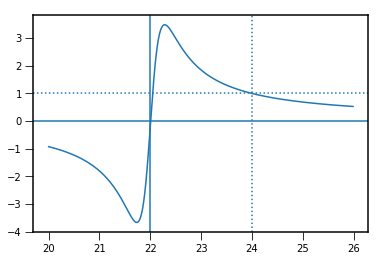

In [3]:
#Resonance model from Bartlett & Stevenson  (2016) Geophysical Research Letters 43, 5716
def resonance_Bartlett(rotation_period, omega_0 = 2. * np.pi/(3600. *22.), Q_thermal = 10.):
    #omega_0 = 2. * np.pi / (3600. * 22.)  #P_res = 22 hours is from Hanbo resonant spin
    #Q_thermal = 10.  From Hanbo as well
    Gamma = omega_0/Q_thermal
    omega = 2. * np.pi / (3600. * rotation_period)
    A_top = 4.* omega * (omega**2 - omega_0**2) + omega * Gamma**2
    A_bottom = 4. * (omega**2 - omega_0**2)**2 + omega**2 * Gamma**2
    Amplitude  = -A_top / A_bottom
    #Find the index corresponding to a 24 hour period
    index_24 = np.where(rotation_period - 24. > 0)[0][0]
    print('index_24 = ', index_24)
    #Amplitude = Torque_Moon / 16. * Amplitude/ Amplitude[index_24]
    #
    Amplitude =  Amplitude/ Amplitude[index_24] #Normalize so that lod=24 hours gives an amplitude of 1
    #
    return(Amplitude)

rotation_period = np.arange(20., 26., 0.01)

Period_0 = 22. #in hours
omega_0 = 2. * np.pi / (3600. * Period_0)
Q_test = 20.
test_resonance = resonance_Bartlett(rotation_period, omega_0, Q_test)
fig, ax = plt.subplots()
plt.plot(rotation_period, test_resonance)
plt.axhline(1., ls =':')
plt.axvline(24, ls = ':')
plt.axvline(Period_0)
plt.axhline(0)
plt.show()

 
P_0 = 1.011500e+06,  gamma = 1.400000e+00
prefactor = 7.535581e-02 S_0_tilde = 7.480000e+05

k_b/mu_air /c_V = 4.000000e-01
index_24 =  400
index_24 =  400
index_24 =  400
predicted pressure amplitude at the equator = -2.478914e+03, 


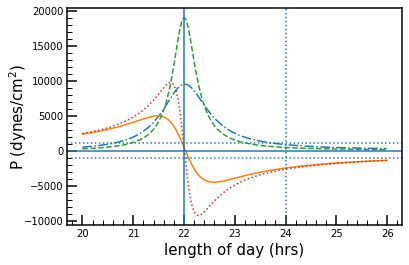

In [4]:
#Resonance model from my notes titled Nov 2018
def resonance(rotation_period, omega_0 = 2. * np.pi/(3600. *22.), Q_thermal = 10.):
    #omega_0 = 2. * np.pi / (3600. * 22.)  #P_res = 22 hours is from Hanbo resonant spin
    #Q_thermal = 10.  From Hanbo as well
    Gamma = omega_0/Q_thermal
    omega = 2. * np.pi / (3600. * rotation_period)
    #
    A_top_sine = (2.* omega * (omega**2 - omega_0**2) + 0.5 * omega * Gamma**2)
    A_top_cosine = Gamma * omega_0**2
    #
    A_bottom = 4. * (omega**2 - omega_0**2)**2 + omega**2 * Gamma**2
    Amplitude_sine  = A_top_sine / A_bottom
    Amplitude_cosine = A_top_cosine / A_bottom
    #Find the index corresponding to a 24 hour period
    index_24 = np.where(rotation_period - 24. > 0)[0][0]
    print('index_24 = ', index_24)
    #Amplitude = Torque_Moon / 16. * Amplitude/ Amplitude[index_24]
    #Amplitude_cosine =  Amplitude_cosine/ Amplitude_sine[index_24]
    #Amplitude_sine =  Amplitude_sine/ Amplitude_sine[index_24]
    return(Amplitude_cosine, Amplitude_sine, index_24)


Period_0 = 22. #resonant length of day, in hours
omega_0 = 2. * np.pi / (3600. * Period_0)
Q_test = 10.
Gamma = omega_0/Q_test

# Calculate the scale height of Earth's atmosphere
H_0 = c_s**2/g
P_0 = c_s**2 * rho_air / gamma
print(' ')
print('P_0 = %e, ' % P_0, 'gamma = %e' %gamma)
#
#Prefactor to the resonance amplitude, from my notes Nov. 2018
#
prefactor = 2./(3. *np.pi) * k_b / (mu_air * c_V) * rho_air * g / P_0 *S_0_tilde 
print('prefactor = %e' %prefactor, 'S_0_tilde = %e' %S_0_tilde)
print('')
print('k_b/mu_air /c_V = %e' %(k_b/(mu_air * c_V) ) )
#
my_test_resonance_cosine, my_test_resonance_sine, index_24 = resonance(rotation_period, omega_0, Q_test)
Q_large = 20.
my_test_resonance_cosine_20, my_test_resonance_sine_20, index_24 = resonance(rotation_period, omega_0, Q_large)
Bartlett_resonance = resonance_Bartlett(rotation_period, omega_0, Q_test)
#

Pressure_cosine = prefactor * my_test_resonance_cosine
Pressure_sine   = prefactor * my_test_resonance_sine
print('predicted pressure amplitude at the equator = %e, ' %Pressure_sine[index_24])
Pressure_cosine_20 = prefactor * my_test_resonance_cosine_20
Pressure_sine_20   = prefactor * my_test_resonance_sine_20
#

fig, ax = plt.subplots()
plt.plot(rotation_period, Pressure_cosine, ls = '-.')
plt.plot(rotation_period, Pressure_sine)
#
plt.plot(rotation_period, Pressure_cosine_20, ls = '--')
plt.plot(rotation_period, Pressure_sine_20, ls =':')
#plt.plot(rotation_period, test_resonance * 0.9e4, color = 'red', ls = '--')
#
plt.axhline(1100., ls =':') #The observed pressure perturbation is 1 or 1.1 mb (1000 to 1100 cgs units)
plt.axhline(-1100., ls =':')
#
plt.axvline(24, ls = ':')
plt.axvline(Period_0)
plt.axhline(0)
plt.xlabel(r'length of day (hrs)', fontsize = label_fontsize)
plt.ylabel(r'P (dynes/cm$^2$)', fontsize = label_fontsize, labelpad = -5)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
plt.savefig('Fig_analytic_pressure.pdf')
plt.show()

In [5]:
print('Atmospheric pressure = P_0 = ', P_0, P_0/1.e6, 'should be 1.013e6')
print ('sine component of the pressure = ',Pressure_sine[400])
print ('sine component of the pressure / Pressure_0 = ',Pressure_sine[400]/P_0)
print('cosine component of the pressure = ', Pressure_cosine[400])
print (Pressure_sine[400]/Pressure_cosine[400])
print('')
#
k_wave = 1./R_Earth
omega_24 = 2.*np.pi/(24. * 3600)
u_0 = k_wave * np.abs(Pressure_sine[400])/(omega_24 * rho_air)
print('u_0 = k np.abs(P_sin)/(omega rho_0) = ', u_0, 'cm/s')
#The Reynolds number
mfp_air = 6.6e-6     #Jenings, S. G., (1998) J. Aerosol Sci 19 p159
kappa_air = 1.8e-4 
nu_air = kappa_air / rho_air
print('viscosity of air = ', nu_air)
print(' ')
print('Reynolds number of air = u_0 H/nu_air = %e' % (u_0 * H_0 / nu_air))

Atmospheric pressure = P_0 =  1011499.9999999999 1.0114999999999998 should be 1.013e6
sine component of the pressure =  -2478.913666617102
sine component of the pressure / Pressure_0 =  -0.002450730268529019
cosine component of the pressure =  860.0150208627665
-2.8824074074081376

u_0 = k np.abs(P_sin)/(omega rho_0) =  43.67687744514574 cm/s
viscosity of air =  0.1469387755102041
 
Reynolds number of air = u_0 H/nu_air = 3.506283e+08


In [6]:
print ('Pressure amplitude at 24 h period = ',Pressure_sine[400])
print('corresponding velocity = ', )
print(Pressure_cosine[400])
print (Pressure_sine[400]/Pressure_cosine[400])
phase = np.arctan( Pressure_cosine[400] / Pressure_sine[400] )
phase_degrees = 180./np.pi * np.arctan( Pressure_cosine[400] / Pressure_sine[400] )
time_max_pressure = 12. + phase/np.pi * 12.
print('phase =', 180.+phase_degrees, phase)
print('time at max pressure perturbation=', time_max_pressure)
print('cos (beta) = ', np.cos(phase), 'sin (beta) = ', np.sin(phase))
print (Gamma)
print('H_0 = ', H_0)
print(prefactor)
print(c_V/k_b)

Pressure amplitude at 24 h period =  -2478.913666617102
corresponding velocity = 
860.0150208627665
-2.8824074074081376
phase = 160.86669205908032 -0.33393922036702495
time at max pressure perturbation= 10.724446137272022
cos (beta) =  0.9447585298561695 sin (beta) =  -0.3277671738658544
7.933314781792407e-06
H_0 =  1179591.836734694
0.07535580866330617
5.1692195719059115e+22


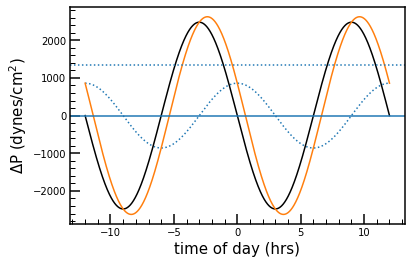

In [7]:
t = np.linspace(-12.*3600, 12.*3600., 24*3600)
omega_24 = 2.*np.pi/(24. * 3600.)
daily_pressure_cosine = Pressure_cosine[400] * np.cos(2.*omega_24 * t)
daily_pressure_sine   = Pressure_sine[400] * np.sin(2.*omega_24 * t)
#
fig, ax = plt.subplots()
plt.plot( t/3600., daily_pressure_cosine, ls = ':')
plt.plot( t/3600., daily_pressure_sine,  color = 'black')
plt.plot( t/3600., daily_pressure_cosine + daily_pressure_sine)
#
plt.axhline(1./760.*P_0, ls =':') #The observed pressure perturbation, six time smaller
#
plt.axhline(0)
plt.xlabel(r'time of day (hrs)', fontsize = label_fontsize)
plt.ylabel(r'$\Delta$P (dynes/cm$^2$)', fontsize = label_fontsize)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
plt.show()

Torque observed = -2.606174e+22,  dyne-cm
Lunar torque = 4.549321e+23,  dyne cm


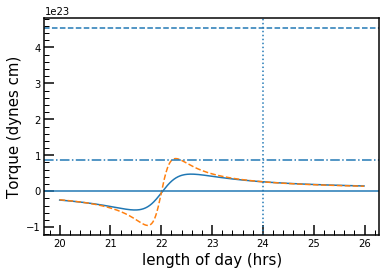

In [8]:
# Now the torque, from Leconte et al. (2015)
Torque = -G * M_sun * R_Earth / g * np.sqrt(24. * np.pi/5) * \
(R_Earth/AU)**3 * Pressure_sine
Torque_obs = -G * M_sun * R_Earth / g * np.sqrt(24. * np.pi/5) * \
(R_Earth/AU)**3 * 1010.
Torque_scaled_to_obs = -Torque / Torque[index_24] * Torque_obs
#
Torque_20 = -G * M_sun * R_Earth / g * np.sqrt(24. * np.pi/5) * \
(R_Earth/AU)**3 * Pressure_sine_20
Torque_obs_20 = -G * M_sun * R_Earth / g * np.sqrt(24. * np.pi/5) * \
(R_Earth/AU)**3 * 1010.
Torque_scaled_to_obs_20 = -Torque_20 / Torque_20[index_24] * Torque_obs
#print('Torque = %e, ' %Torque, 'dyne-cm', 'Calculated pressue = %e, ' %Pressure_sine[400])
print('Torque observed = %e, ' %Torque_obs, 'dyne-cm')
#
# Calculate the Lunar gravitational torque
#

mu = G*( M_Earth + M_moon)
L_moon = M_moon * np.sqrt(mu * a_moon_cgs_0 *(1.- e_Moon**2))
#
# Calculate the current Lunar torque
Torque_Moon = 0.5 * a_dot_0_cgs / a_moon_cgs_0 * L_moon
print('Lunar torque = %e, ' %Torque_Moon, 'dyne cm')
#
fig, ax = plt.subplots()
#plt.plot(rotation_period, Torque, ls = ':')
plt.plot(rotation_period, Torque_scaled_to_obs)
#
#plt.plot(rotation_period, Torque_20, ls = '-.')
plt.plot(rotation_period, Torque_scaled_to_obs_20, ls = '--')
#plt.plot(rotation_period, test_resonance * 0.9e4, color = 'red', ls = '--')
#
#plt.axhline(-Torque_Moon, ls ='-.') #
plt.axhline(Torque_Moon, ls ='--') #
plt.axhline(Torque_Moon * 11.5/60., ls ='-.') #
#
plt.axvline(24, ls = ':')
plt.axhline(0)
plt.xlabel(r'length of day (hrs)', fontsize = label_fontsize)
plt.ylabel(r'Torque (dynes cm)', fontsize = label_fontsize)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
plt.savefig('Fig_analytic_torque.pdf')
plt.show()

In [9]:
#
print('Lunar gravitational torque on Earth = %.3e, '%Torque_Moon)
print('Thermal torque over Lunar torque = %.2e, ' %(np.abs(Torque_obs)/Torque_Moon))
print('Lunar torque over Thermal torque  = %.2e, ' %(Torque_Moon/np.abs(Torque_obs)))
print('Lunar torque now over Lunar torque then  = %.2e, ' %(60./11.5))

Lunar gravitational torque on Earth = 4.549e+23, 
Thermal torque over Lunar torque = 5.73e-02, 
Lunar torque over Thermal torque  = 1.75e+01, 
Lunar torque now over Lunar torque then  = 5.22e+00, 


In [10]:
# test out various formats
rho_air * k_b * 289. / mu_air /1.e6
print('The value of pi is approximately %5.3f.' % np.pi)
print('k_b/mu = %5.2e' % (k_b/mu_air)) 
print('k_b/mu = {:5.2e} erg/g/K'.format(k_b/mu_air) )
print('c_p for air = {:5.2e} erg/g/K'.format(7.*k_b/(2.*mu_air)) )
print('or {:5.4f} J/g/K'.format(7.*k_b/(2.*mu_air)/1.e7) )

The value of pi is approximately 3.142.
k_b/mu = 2.85e+06
k_b/mu = 2.85e+06 erg/g/K
c_p for air = 9.99e+06 erg/g/K
or 0.9987 J/g/K
